<a href="https://colab.research.google.com/github/MelaOchoa/LosCapis/blob/main/RegresionLogistica_LosCapis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
datos = pd.read_csv("CarLogistica.csv")


In [ ]:
datos.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [ ]:
datos.describe()

,Age,Speed_of_Impact,Survived
count,200.00000,197.000000,200.00000
mean,43.42500,70.441624,0.50500
std,14.94191,30.125298,0.50123
min,18.00000,20.000000,0.00000
25%,31.00000,43.000000,0.00000
50%,43.50000,71.000000,1.00000
75%,56.00000,95.000000,1.00000
max,69.00000,119.000000,1.00000


In [ ]:
datos.isna().sum()

,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


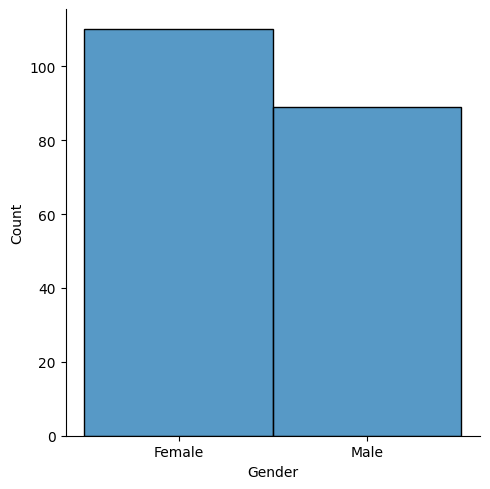

In [ ]:
import seaborn as sb
sb.displot(x="Gender", data=datos)

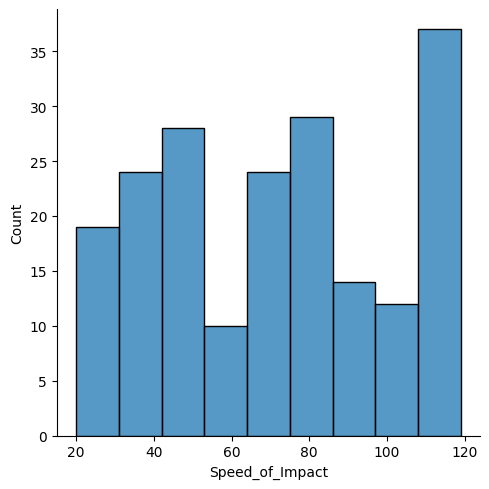

In [ ]:
sb.displot(x="Speed_of_Impact", data=datos)

In [ ]:
datos["Gender"]

,Gender
0,Female
1,Female
2,Male
3,Male
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


In [ ]:
datos["Speed_of_Impact"]

,Speed_of_Impact
0,27.0
1,46.0
2,46.0
3,117.0
4,40.0
...,...
195,111.0
196,51.0
197,110.0
198,103.0


In [ ]:
datos = datos.dropna(subset=['Gender'])


In [ ]:
datos.isna().sum()

,0
Age,0
Gender,0
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [ ]:
datos["Speed_of_Impact"].mean()

70.43367346938776

In [ ]:
datos["Speed_of_Impact"] = datos["Speed_of_Impact"].fillna(datos["Speed_of_Impact"].mean())


In [ ]:
datos.isna().sum()

,0
Age,0
Gender,0
Speed_of_Impact,0
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [ ]:
datos.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [ ]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2)


In [ ]:
dummies_sex = pd.get_dummies(datos["Gender"], drop_first=True)

In [ ]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Gender"], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_ent, y_ent)


LogisticRegression(max_iter=1000)

In [ ]:
datos["Gender"] = datos["Gender"].replace({"Male": 1, "Female": 0})


<ipython-input-54-fbd93924af89>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos["Gender"] = datos["Gender"].replace({"Male": 1, "Female": 0})


In [ ]:
datos.replace({"Yes": 1, "No": 0}, inplace=True)


<ipython-input-58-f279fae480fc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos.replace({"Yes": 1, "No": 0}, inplace=True)


In [ ]:
predicciones = modelo.predict(X_pru)

In [ ]:
X.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used
0,56,0,27.0,0,0
1,69,0,46.0,0,1
2,46,1,46.0,1,1
3,32,1,117.0,0,1
4,60,0,40.0,1,1


In [ ]:
nueva_persona = [20, 35, 123, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Sobreviviste")
else:
  print("No sobreviviste")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but LogisticRegression is expecting 5 features as input.